* Solo con el nombre de las funciones y un buen tipado se deben explica el codigo.
* Variable fijas, prefijadas deben ir al principio del script y nombrarlas con mayusculas
* typing en las funciones. Hay que anotar qué entra y que sale de la función.
* No comentarios redundantes
* siempre ingles
* nombre de las funciones son acciones

## Get the data

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [70]:
try:
    # for pyhton file .py
    PATH = Path(__file__).resolve().parent.parent
except NameError:
    #For Jupyter Notebook
    PATH = Path().resolve().parent.parent

with open(PATH / "config.json", "r") as f:
        VARIABLES = json.load(f)

# path of the folder with .parquet
folder_path = Path(VARIABLES["file_path_CETIC"])


In [ ]:
# Browse the folder to save .parquet
for file_path in folder_path.glob("*.parquet"): 
    # create the name without the extension
    file_name = file_path.stem
    #sampled_datasets[file_name] = pd.read_parquet(file_path)
    print(f"DataFrame: {file_name}")

DataFrame: abandoned_carts
DataFrame: inventory
DataFrame: orders
DataFrame: regulars
DataFrame: users


In [ ]:
abandoned_carts = pd.read_parquet(f"{folder_path}/abandoned_carts.parquet")
inventory = pd.read_parquet(f"{folder_path}/inventory.parquet")
orders = pd.read_parquet(f"{folder_path}/orders.parquet")
regulars = pd.read_parquet(f"{folder_path}/regulars.parquet")
users = pd.read_parquet(f"{folder_path}/users.parquet")

### Function for initial check

In [78]:
def get_initial_data_dataframe_column(column : pd.Series) -> None: 
    try:
        is_null = column.isnull()
        duplicated = column.duplicated()
        column_types = column.apply(type).unique()

        print(f"///{column.name}///")
        print(column.info())
        print("/////")

        print(f"Total values: {column.count()}")
        print(f"Number of null values: {is_null.sum()} is the {is_null.mean() * 100 :.2f}% of data")
        print(f"Duplicates Values: {duplicated.sum()} is the {duplicated.mean() * 100 :.2f}% of data")
        print(f"Number of types: {len(column_types)} types: {column_types}")
        if len(column_types) == 1:

            if column_types == float or column_types == int:
                print(f"The mean: {column.mean()}")
                print(f"The standard deviation: {column.std()}")
                print(f"The min: {column.min()} The max: {column.max()} ")

        print(f"Number of values uniques: {len(column.unique())}")
        if len(column.unique()) < column.count()*0.50:
            print(f"The unique values : {column.unique() :.2f} ")
        print("\n")
    except:
        print("Error") 

## Checks initial to Tables

### User

users.parquet: Information about users.
user_id : Nothing - No changes   
user_segment: Two values, Top Up and Proposition, May be the categorization of pattern of shopping - No changes  
user_nuts1: Values of regions, there are 51 values empty - No changes  
*first_ordered_at: Change the type for pandas Timestamp  
*customer_cohort_month: Change the type for pandas Timestamp 

Only 325 lines have the next data, might be a survey.  
*count_people: there are 93% data empty, we can reemplace the values 0 and nan for 1 person. this way we are not invent data  
*count_adults: this is very similar to count_people, we can delete  
*count_children: The value Nan changes for 0  
*count_babies: The value Nan changes for 0  
*count_pets: The value Nan changes for 0  

#### Checks

In [80]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
 10  n_regulars             4983 non-null   float64
dtypes: float64(6), object(5)
memory usage: 428.4+ KB


In [ ]:
#information about the columns
for column in users:
    get_initial_data_dataframe_column(users[column])

///user_id///
<class 'pandas.core.series.Series'>
RangeIndex: 4983 entries, 0 to 4982
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
4983 non-null   object
dtypes: object(1)
memory usage: 39.1+ KB
None
/////
Total values: 4983
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 4983


///user_segment///
<class 'pandas.core.series.Series'>
RangeIndex: 4983 entries, 0 to 4982
Series name: user_segment
Non-Null Count  Dtype 
--------------  ----- 
4983 non-null   object
dtypes: object(1)
memory usage: 39.1+ KB
None
/////
Total values: 4983
Number of null values: 0 is the 0.00% of data
Duplicates Values: 4981 is the 99.96% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 2
Error
///user_nuts1///
<class 'pandas.core.series.Series'>
RangeIndex: 4983 entries, 0 to 4982
Series name: user_nuts1
Non-Null Count  Dtype 
--------------  ----- 
4932 n

### Abandoned_carts

Abandoned_cart.parquet: If a user has added items to their basket but not bought them, we capture that information. Items that were abandoned are stored as a list in item_ids.

id : Nothing

user_id : Nothing

created_at: Nothing

variant_id: Nothing

*Maybe Create a column with the numbers of products in the carts Len(variant_id)

In [28]:
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [30]:
for column in abandoned_carts:
    get_initial_data_dataframe_column(abandoned_carts[column])

//0        12858560217220
13       20352449839236
45       20478401413252
50       20481783103620
52       20485321687172
              ...      
70036    22233840976004
70041    22233843171460
70043    22233843531908
70049    22233846218884
70050    22233846317188
Name: id, Length: 5457, dtype: int64//
<class 'pandas.core.series.Series'>
Index: 5457 entries, 0 to 70050
Series name: id
Non-Null Count  Dtype
--------------  -----
5457 non-null   int64
dtypes: int64(1)
memory usage: 85.3 KB
None
/////
Total values: 5457
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 21618808560053.117
The standard deviation: 402867859962.06647
The min: 12858560217220 The max: 22233846317188 
Number of values uniques: 5457


//0        5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...
13       9d6187545c005d39e44d0456d87790db18611d7c7379bd...
45       e83fb0273d70c37a2968fee107113698fd4f389c442c0b...
50       10c4

### Inventory

inventory.parquet: Some information about each item_id

variant_id: Nothing  
price: There are 71 products without price, value zero  
compare_at_price: There are 72 products without price, value zero  
vendor: Nothing  
product_type: Nothing  
tags:  Nothing  

In [31]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [33]:
for column in inventory:
    get_initial_data_dataframe_column(inventory[column])

//0       39587297165444
1       34370361229444
2       34284951863428
3       33667283583108
4       33803537973380
             ...      
1728    39539419218052
1729    34534187368580
1730    33826439594116
1731    33667214508164
1732    33667214704772
Name: variant_id, Length: 1733, dtype: int64//
<class 'pandas.core.series.Series'>
RangeIndex: 1733 entries, 0 to 1732
Series name: variant_id
Non-Null Count  Dtype
--------------  -----
1733 non-null   int64
dtypes: int64(1)
memory usage: 13.7 KB
None
/////
Total values: 1733
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 36948799362316.49
The standard deviation: 2725674300769.723
The min: 33615294398596 The max: 40167931707524 
Number of values uniques: 1733


//0        3.09
1        4.99
2        3.69
3        1.79
4        1.99
        ...  
1728     4.99
1729     4.69
1730    15.39
1731    19.49
1732    31.99
Name: price, Length: 1733, dt

### Orders

orders.parquet: An order history of customers. Each row is an order and the item_ids for the order are stored as a list in the item_ids column

id : nothing  
user_id : nothing  
created_at: there is one order duplicate  
order_date: nothing  
user_order_seq: Nothing  
ordered_items: Should create a other column with the number of items in the order  

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [36]:
orders

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."
...,...,...,...,...,...,...
64396,4026096910468,f524eaf26b76bc6226747768f120ffcd23d5c3d52a0a19...,2022-03-13 10:14:22,2022-03-13,5,"[33981947707524, 34284951273604, 3428495127360..."
64488,4026464993412,aa5e21db3186dcd84c161719c5ade8a19adb853ea8bfef...,2022-03-13 18:30:31,2022-03-13,3,"[33803540725892, 34284950519940, 3437091504141..."
64499,4026553434244,14be3833c19e0a1fd7e6db0e5375a3d1dcc9efafcb0e69...,2022-03-13 20:11:50,2022-03-13,11,"[39283356663940, 39283356663940, 4015514504410..."
64523,4026656030852,500027bf392bfa9ef527919569fba44904d429155b7cf4...,2022-03-13 22:29:24,2022-03-13,4,"[33824368033924, 33824368033924, 3382436803392..."


In [37]:
for column in orders:
    get_initial_data_dataframe_column(orders[column])

//10       2204073066628
20       2204707520644
21       2204838822020
34       2208967852164
49       2215889436804
             ...      
64396    4026096910468
64488    4026464993412
64499    4026553434244
64523    4026656030852
64538    4026732413060
Name: id, Length: 8773, dtype: int64//
<class 'pandas.core.series.Series'>
Index: 8773 entries, 10 to 64538
Series name: id
Non-Null Count  Dtype
--------------  -----
8773 non-null   int64
dtypes: int64(1)
memory usage: 137.1 KB
None
/////
Total values: 8773
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 3684683902139.2095
The standard deviation: 414543651600.97345
The min: 2204073066628 The max: 4026732413060 
Number of values uniques: 8773


//10       62e271062eb827e411bd73941178d29b022f5f2de9d37f...
20       bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...
21       329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...
34       f6451fce7b1c58d

In [38]:
orders[["user_order_seq","ordered_items"]]

,user_order_seq,ordered_items
10,1,"[33618849693828, 33618860179588, 3361887404045..."
20,1,"[33618835243140, 33618835964036, 3361886244058..."
21,1,"[33618891145348, 33618893570180, 3361889766618..."
34,1,"[33618830196868, 33618846580868, 3361891234624..."
49,1,"[33667166699652, 33667166699652, 3366717122163..."
...,...,...
64396,5,"[33981947707524, 34284951273604, 3428495127360..."
64488,3,"[33803540725892, 34284950519940, 3437091504141..."
64499,11,"[39283356663940, 39283356663940, 4015514504410..."
64523,4,"[33824368033924, 33824368033924, 3382436803392..."


### Regulars

regulars.parquet: Users are allowed to specify items that they wish to buy regularly. This data gives the items each user has asked to get regularly, along with when they input that information

user_id: Nothing  
variant_id: Should create a other column with number of variant  
created_at: Nothing

In [39]:
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [40]:
regulars

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11
...,...,...,...
37644,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13
37717,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24
37718,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24
37719,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24


In [41]:
for column in regulars:
    get_initial_data_dataframe_column(regulars[column])

//3        68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...
11       aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...
18       68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...
46       aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...
47       4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...
                               ...                        
37644    20a41b8fa616484b39812aaa377ea1b53247f6941c0586...
37717    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37718    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37719    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37720    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
Name: user_id, Length: 18105, dtype: object//
<class 'pandas.core.series.Series'>
Index: 18105 entries, 3 to 37720
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
18105 non-null  object
dtypes: object(1)
memory usage: 282.9+ KB
None
/////
Total values: 18105
Number of null values: 0 is the 0.00% of data
Duplicates Values: 16657 

## Relations

### Type of users who abandon more cars

<Axes: ylabel='n_abandoned_cars_by_users_segment'>

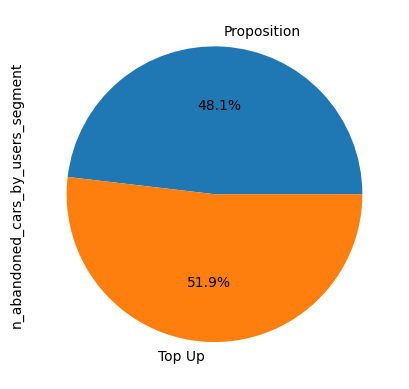

In [81]:
#Usuarios que abandonan compras: Se puede analizar qué segmentos (user_segment) tienen más carritos abandonados.
#Users who abandon cars: User segment which have more abandoned carts
#Count number of carts abandoned
n_abandoned_cars = (
abandoned_carts.groupby("user_id")["id"]
.nunique()
.reset_index()
.rename(columns={"id":"n_abandoned_cars"}))

#merge which the users dataframe and user segment
n_abandoned_cars_by_users_segment = (
users.merge(n_abandoned_cars, on="user_id",how="inner")
    .groupby("user_segment")["n_abandoned_cars"]
    .sum()
    .reset_index()
    .rename(columns={"n_abandoned_cars":"n_abandoned_cars_by_users_segment"})
)
n_abandoned_cars_by_users_segment.set_index("user_segment")["n_abandoned_cars_by_users_segment"].plot(kind="pie", autopct="%1.1f%%")

### Number of regulars of each user segment

<Axes: xlabel='user_segment'>

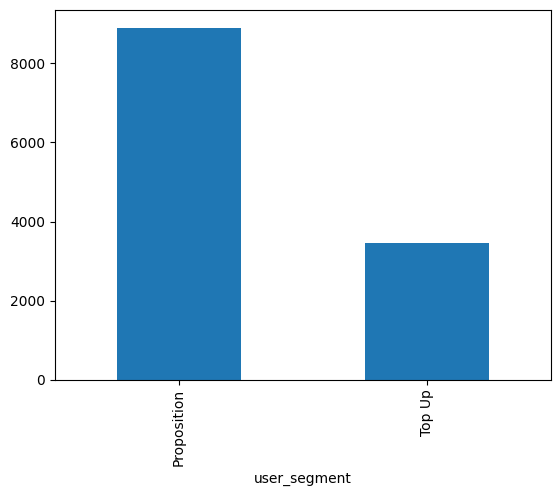

In [86]:
#count products regular bu user id
n_products_regulars = (
	regulars.groupby("user_id")["variant_id"]
    .nunique()
    .reset_index()
    .rename(columns={"variant_id":"n_products_regulars"})
)

#n regulars by user_segment
users = users.merge(n_products_regulars, on="user_id",how="left").fillna({"n_products_regulars":0})
users.groupby("user_segment")["n_products_regulars"].sum().plot(kind="bar")


### Numbers of products abandoned vs purchased

In [88]:
#number products abandoned
n_abandoned = (
    abandoned_carts["variant_id"]
    .explode('variant_id')
    .value_counts()
    .rename("n_abandoned")
    )
#number products purchased
n_purchased = (
    orders["ordered_items"]
    .explode("ordered_items")
    .value_counts()
    .rename("n_purchased")
)
n_purchased.index = n_purchased.index.rename("variant_id")

inventory = inventory.merge(n_abandoned, on="variant_id",how="inner")
inventory = inventory.merge(n_purchased, on="variant_id",how="inner")

In [90]:
#relation_buy_vs_abandoned: products almost always are purchased and almost never abandoned
inventory["relation_buy_vs_abandoned"] = (inventory["n_purchased"]/(inventory["n_purchased"]+inventory["n_abandoned"]))*100
relation_buy_vs_abandoned = inventory.sort_values(by="relation_buy_vs_abandoned",ascending=False)
relation_buy_vs_abandoned[["product_type","relation_buy_vs_abandoned","price","compare_at_price","vendor"]]

,product_type,relation_buy_vs_abandoned,price,compare_at_price,vendor
807,tins-packaged-foods,97.826087,1.36,1.59,biona
385,cleaning-products,97.222222,5.19,5.25,ecoforce
446,dog-food,96.875000,4.89,4.98,bakers
852,bath-shower-gel,96.875000,5.79,5.92,faithinnature
456,haircare,96.774194,7.49,7.50,lovebeautyplanet
...,...,...,...,...,...
550,superfoods-supplements,25.000000,23.99,24.00,funktionalfoods
746,washing-capsules,25.000000,9.99,10.00,persil
122,home-baking,25.000000,14.99,17.08,various
868,dental,20.000000,4.99,5.99,brushd


### Numbers of pets, babies or children

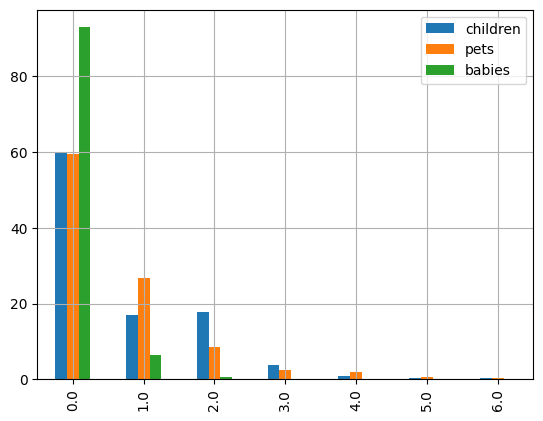

In [121]:
#count of each stadistics
n_children = users.count_children.value_counts(normalize=True).sort_index() * 100
n_pets = users.count_pets.value_counts(normalize=True).sort_index() * 100
n_babies = users.count_babies.value_counts(normalize=True).sort_index() * 100

n_children_pets_babies = pd.DataFrame({
    'children': n_children,
    'pets': n_pets,
    'babies': n_babies
})
n_children_pets_babies.plot(kind="bar").grid()

In [139]:
for column in n_children_pets_babies:
    print(f"{n_children_pets_babies[column][n_children_pets_babies.index>=1].sum() :.2f}% of poblation has {column}")

40.00% of poblation has children
40.62% of poblation has pets
7.08% of poblation has babies


#### survey

In [163]:
survey = users.merge(orders[["order_date","user_id"]], on="user_id",how="left")

In [170]:
survey[["user_id","count_children","count_babies","count_pets","order_date"]].dropna()["user_id"].nunique()

325

In [154]:
orders.order_date.max()

Timestamp('2022-03-14 00:00:00')

## f

<Axes: xlabel='user_nuts1'>

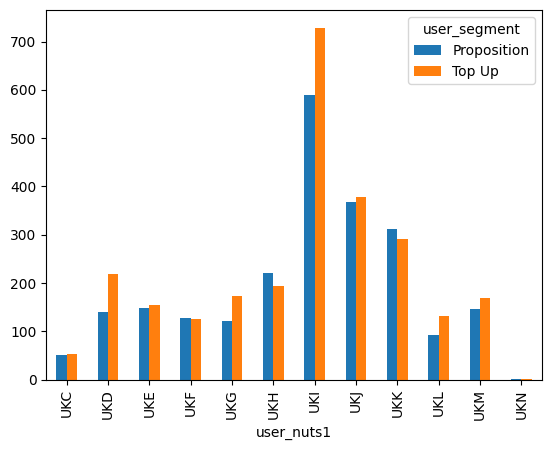

In [13]:
#11
pd.crosstab(users["user_nuts1"], users["user_segment"]).plot(kind="bar")
#insights in 12

In [17]:
#13
regulars_df = regulars.merge(inventory, on="variant_id",how="left")
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


<Axes: xlabel='created_at'>

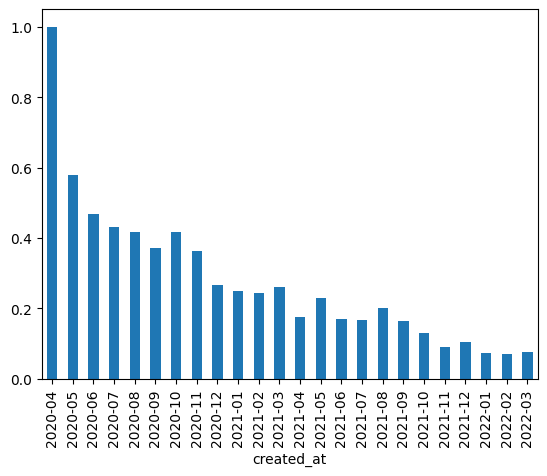

In [ ]:
#13
regulars_df.groupby(regulars_df.created_at.dt.to_period("M"))["price"].apply(lambda x: x.isna().sum() / len(x)).plot(kind="bar")

In [20]:
#14
regulars_df.created_at.min(), regulars_df.created_at.max()

(Timestamp('2020-04-30 13:09:27'), Timestamp('2022-03-14 07:49:24'))

In [21]:
#14
regulars_df.isna().sum()

user_id                0
variant_id             0
created_at             0
price               3071
compare_at_price    3071
vendor              3071
product_type        3071
tags                3071
dtype: int64

<Axes: xlabel='variant_id'>

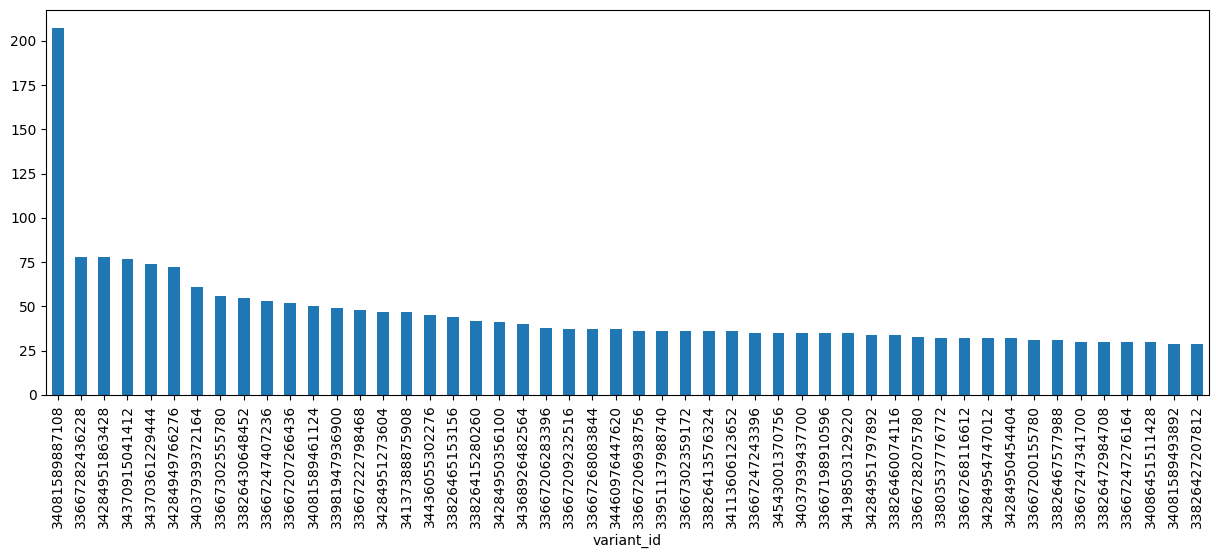

In [22]:
#14
clean_products_regulars = regulars_df.dropna()
clean_products_regulars.groupby(["variant_id"])["user_id"].nunique().sort_values(
    ascending= False
    ).head(50).plot(kind="bar",figsize=(15,5))

In [27]:
#16
top_product = (
clean_products_regulars.groupby(["variant_id"])["user_id"]
.nunique()
.sort_values(ascending=False)
.head(1)
.index[0]
)
clean_products_regulars.loc[lambda x: x.variant_id == top_product][
["variant_id", "price", "product_type", "vendor"]
].drop_duplicates()

,variant_id,price,product_type,vendor
95,34081589887108,10.79,long-life-milk-substitutes,oatly


In [ ]:
#17 primera no hize, no voy a usar seaborn

Text(0.5, 1.0, 'top 50 vendors by number of regulars (out of 367)')

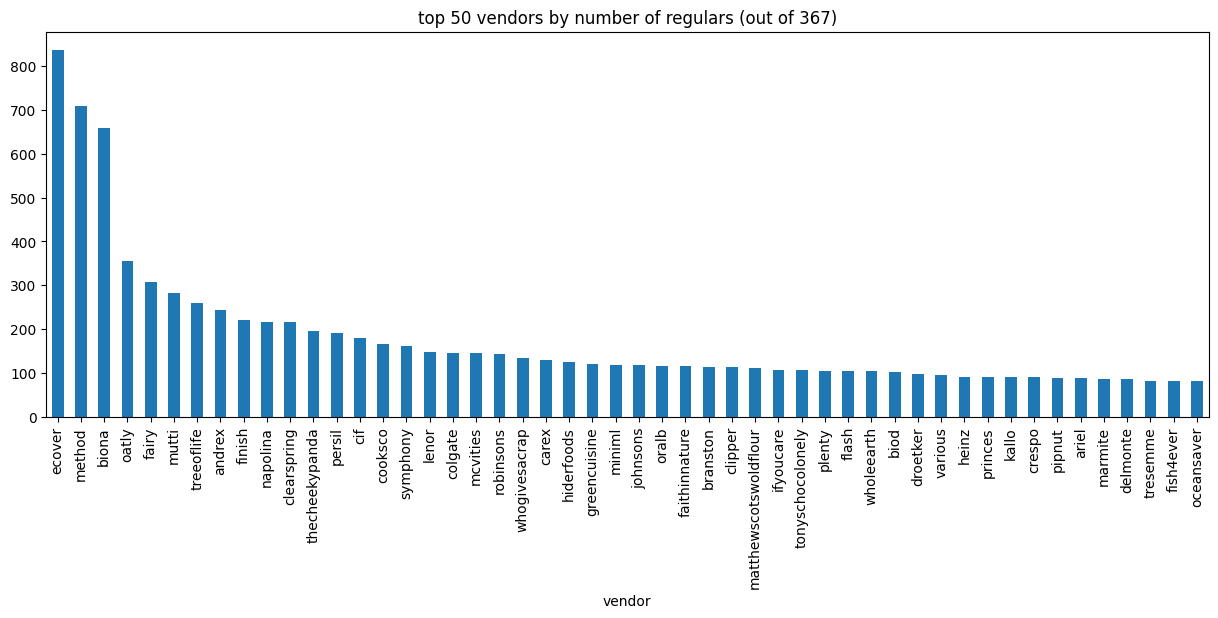

In [ ]:
#17
clean_products_regulars["vendor"].value_counts().head(50).plot(kind="bar",figsize=(15,5))
plt.title(f"top 50 vendors by number of regulars (out of {clean_products_regulars.vendor.nunique()})")

Text(0.5, 1.0, 'top 30 product_type by number of products (out of 59 product_types)')

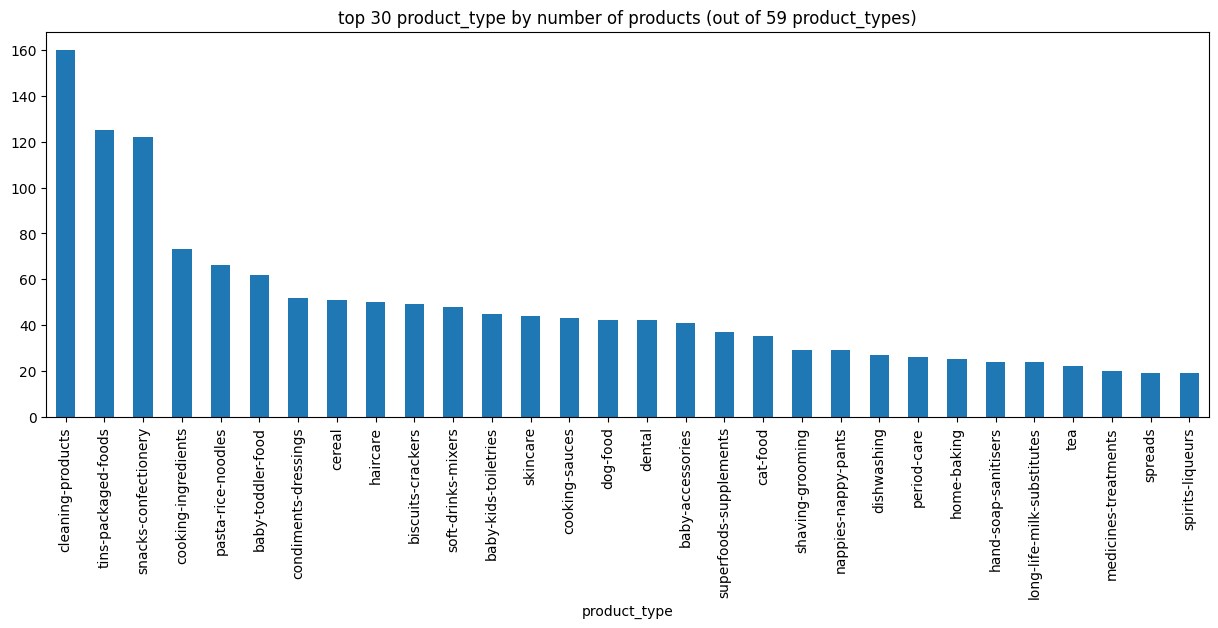

In [33]:
#19
inventory["product_type"].value_counts().head(30).plot(kind="bar", figsize=(15,5))
plt.title(f"top 30 product_type by number of products (out of {inventory.product_type.nunique()} product_types)")

In [36]:
#20
diff_prevalence = (
    inventory["product_type"]
    .value_counts(normalize=True)
    .rename("inventory_count")
    .reset_index()
    .merge(
        clean_products_regulars["product_type"]
        .value_counts(normalize=True)
        .rename("regulars_count")
        .reset_index()
    )
    .assign(inventory_rank=lambda x:x.inventory_count.rank(ascending=False))
    .assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
    .assign(diff=lambda x: x.inventory_count - x.regulars_count)
)
#21
#insights en la 21
diff_prevalence.sort_values("regulars_count",ascending=False).head(10)


,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025
2,snacks-confectionery,0.070398,0.043900,3.0,6.0,0.026498
25,long-life-milk-substitutes,0.013849,0.037648,25.5,7.0,-0.023799
6,condiments-dressings,0.030006,0.034655,7.0,8.0,-0.004649
10,soft-drinks-mixers,0.027698,0.032061,11.0,9.0,-0.004363
7,cereal,0.029429,0.031329,8.0,10.0,-0.001900


In [39]:
#22
orders.order_date.min(), orders.order_date.max(), orders.user_id.nunique()

(Timestamp('2020-04-30 00:00:00'), Timestamp('2022-03-14 00:00:00'), 4983)

In [40]:
#22
orders.loc[lambda x: x.user_order_seq>1].user_id.nunique()

1411

<Axes: xlabel='user_order_seq'>

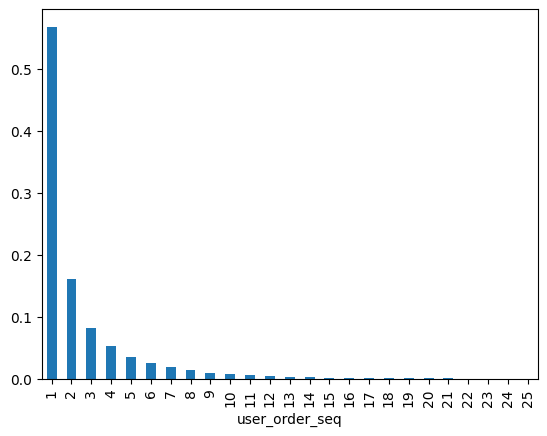

In [42]:
#22
orders["user_order_seq"].value_counts(normalize=True).plot(kind="bar")

In [54]:
#23
order_items = orders.explode("ordered_items").rename({"ordered_items":"variant_id"},axis=1)
order_items.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060


In [55]:
#24
order_items = order_items.merge(inventory, on="variant_id",how="left")
print(f"pct of missing bpught products on inventory: {100 * order_items.price.isna().sum() / order_items.shape[0]:.2f}%")
#LLegue hasta la imagen 24, las demas no las copie

pct of missing bpught products on inventory: 14.45%
